# Assignment #1 - Deep Neural Network

<font color="red"> <b> Due: Feb 13 (Friday) 11:00 pm </b> </font>

<font color="blue"> Abeoseh Flemister </font>

# Introduction

[General introduction of this writing assignment] Describe the objective of this assignment. You can briefly state how you accompilsh it.

#### Classification: [Buy now pay later repayment status.](https://www.kaggle.com/datasets/bhanageviraj/buy-now-pay-later-bnpl-dataset?resource=download)

My objective is to build a deep neural network to analyze defaults with buy now pay later data (BNPL). I am classifying people as either Defaulted, Paid On Time, Late Payment using a multilayer perceptron.

|  |  |  |  |
|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 50000 | 
| Attribute Characteristics: | Integer, Real | Number of Attributes: | 7 | 
| Associated Tasks: | Classification, Regression | Missing Values? | none | 


#### Regression: [Determine possum head length.](https://www.kaggle.com/datasets/abrambeyer/openintro-possum)

My objective is to build a deep neural network to determine possum head length. 
|  |  |  |  |
|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 104 | 
| Attribute Characteristics: | Integer, Real | Number of Attributes: | 13 | 
| Associated Tasks: | Classification, Regression | Missing Values? | 3 | 



# Data

## BNPL
> The BNPL dataset has 50,000 observations. There are no missing values and there are four categorical columns. From the pairplot I can see that there are more people who paid on time than paid late or defaulted. I can also see that the fewest amount of people who defaulted. Most people made small payments and lower credit scores tended to default more frequently. There weren't any large associations.

## Possum
> The possum dataset has 104 observations and three missing values, one in foot length and two in age. From the pairplot and correlation matrix I can see that head length (the variable I am predicting) is correlated with total length (r=0.67) and skull width (r=0.71). Other variables weren't well associated with head length. Other variables did not have large correlations with each other except skull width and chest; foot length and ear conch; and chest with belly.. 




In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("TF version:", tf.__version__)
import matplotlib.pyplot as plt   
import numpy as np
import pandas as pd
import seaborn as sns
from keras.utils import to_categorical, plot_model
# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout

# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_colwidth')


TF version: 2.20.0


## Classification: BNPL

In [2]:
bnpl = pd.read_csv("bnpl_dataset.csv") 
bnpl.shape

(50000, 9)

Check how many NA values exist. There are no missing values.

In [3]:
bnpl.isna().sum()

Transaction_ID       0
Customer_Age         0
Gender               0
Annual_Income        0
Credit_Score         0
Purchase_Category    0
BNPL_Provider        0
Purchase_Amount      0
Repayment_Status     0
dtype: int64

In [4]:
print(bnpl[['Gender', 'Purchase_Category', 'BNPL_Provider', "Repayment_Status"]].apply(lambda col: col.unique()))
print(bnpl[['Gender', 'Purchase_Category', 'BNPL_Provider', "Repayment_Status"]].apply(lambda col: len(col.unique())))

Gender                                      [Male, Female, Non-Binary]
Purchase_Category    [Beauty, Groceries, Travel, Fashion, Home & Fu...
BNPL_Provider                       [Sezzle, Affirm, Klarna, Afterpay]
Repayment_Status               [Defaulted, Paid On Time, Late Payment]
dtype: object
Gender               3
Purchase_Category    6
BNPL_Provider        4
Repayment_Status     3
dtype: int64


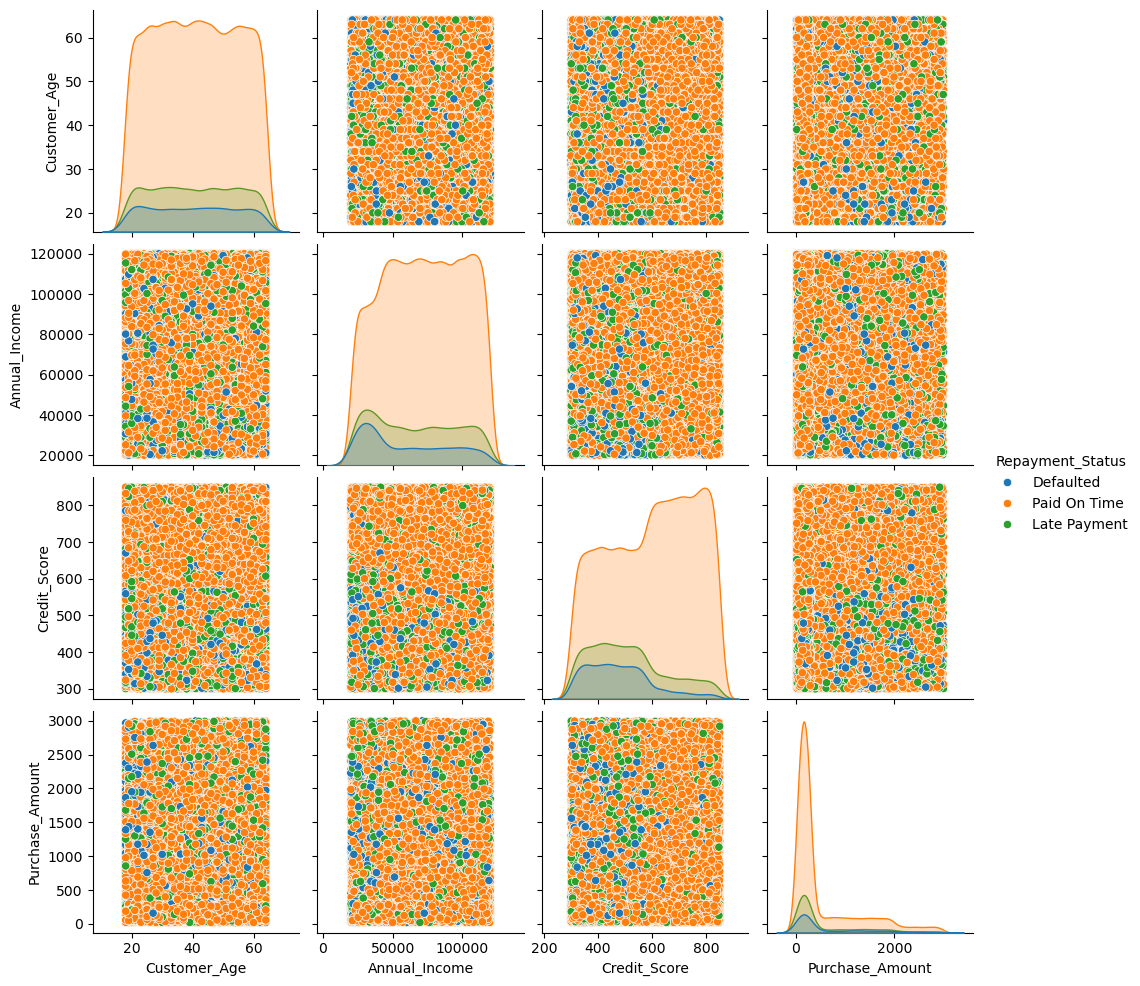

In [5]:
selected_columns = bnpl[['Customer_Age', 'Annual_Income', 'Credit_Score', 'Purchase_Amount', "Repayment_Status"]]

sns.pairplot(selected_columns, diag_kind="kde", hue = "Repayment_Status")

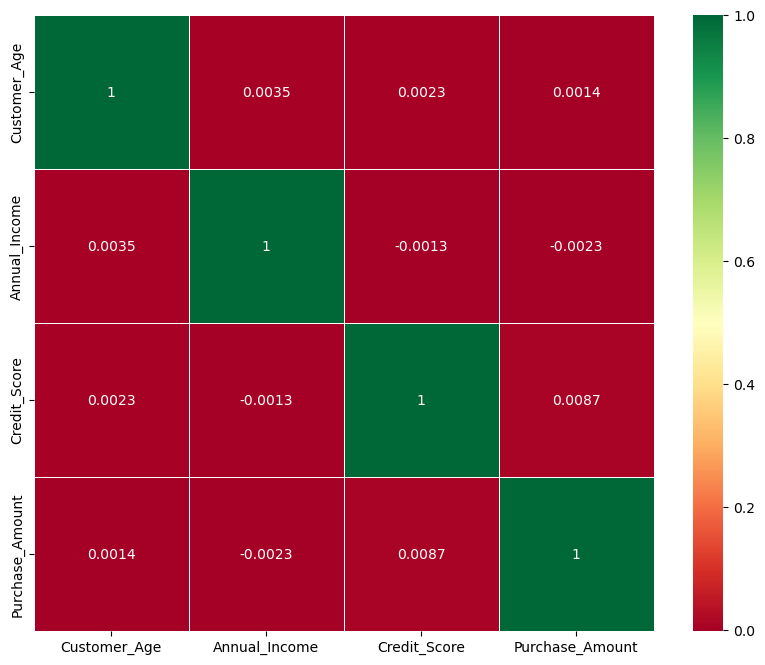

In [6]:
selected_columns = bnpl[['Customer_Age', 'Annual_Income', 'Credit_Score', 'Purchase_Amount']]

# Create a correlation matrix
corr = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.show()

Encode and split the data

In [7]:
bnpl.columns

Index(['Transaction_ID', 'Customer_Age', 'Gender', 'Annual_Income',
       'Credit_Score', 'Purchase_Category', 'BNPL_Provider', 'Purchase_Amount',
       'Repayment_Status'],
      dtype='object')

In [8]:
for col in ['Gender', 'Purchase_Category', 'BNPL_Provider']:
    bnpl = pd.concat([bnpl, pd.get_dummies(bnpl[col])], axis = 1).drop([col], axis = 1)
    # bnpl[col] = bnpl[col].astype(int)

bnpl = bnpl.drop("Transaction_ID", axis = 1)

In [9]:
boolean_columns = bnpl.select_dtypes(include='bool').columns.to_list()

bnpl[boolean_columns] = bnpl[boolean_columns].astype(int)

bnpl

Customer_Age  Annual_Income  Credit_Score  Purchase_Amount  \
0                56          32293           353              249   
1                46          72774           354              188   
2                32          82207           630             1610   
3                60          92498           470              120   
4                25          32060           502             1849   
...             ...            ...           ...              ...   
49995            60          78276           543              262   
49996            46          40989           828              263   
49997            19          64502           648             1777   
49998            43          44026           481             1648   
49999            28          33834           810              456   

      Repayment_Status  Female  Male  Non-Binary  Beauty  Electronics  \
0            Defaulted       0     1           0       1            0   
1         Paid On Time       0     1           0       0            0   
2         Paid On Time       0     1           0       0            0   
3         Paid On Time       0     1           0       0            0   
4         Paid On Time       0     1           0       0            0   
...                ...     ...   ...         ...     ...          ...   
49995     Paid On Time       0     1           0       0            0   
49996     Paid On Time       1     0           0       0            0   
49997     Paid On Time       1     0           0       0            0   
49998     Paid On Time       0     1           0       0            0   
49999     Paid On Time       0     1           0       0            1   

       Fashion  Groceries  Home & Furniture  Travel  Affirm  Afterpay  Klarna  \
0            0          0                 0       0       0         0       0   
1            0          1                 0       0       1         0       0   
2            0          0                 0       1       0         0       0   
3            1          0                 0       0       0         0       0   
4            0          0                 0       1       0         0       1   
...        ...        ...               ...     ...     ...       ...     ...   
49995        0          1                 0       0       0         0       1   
49996        1          0                 0       0       0         0       0   
49997        0          0                 0       1       1         0       0   
49998        0          0                 0       1       0         1       0   
49999        0          0                 0       0       1         0       0   

       Sezzle  
0           1  
1           0  
2           1  
3           1  
4           0  
...       ...  
49995       0  
49996       1  
49997       0  
49998       0  
49999       0  

[50000 rows x 18 columns]

In [10]:
bnpl_train_data = bnpl.sample(frac=0.8, random_state=0)#Splitting the data(80% for training and 20% for testing)
bnpl_test_data = bnpl.drop(bnpl_train_data.index)

bnpl_x_train = bnpl_train_data.copy()
bnpl_x_test = bnpl_test_data.copy()

bnpl_y_train = bnpl_x_train.pop('Repayment_Status')
bnpl_y_test = bnpl_x_test.pop('Repayment_Status')

bnpl_y_train = to_categorical(np.asarray(bnpl_y_train.factorize()[0]))
bnpl_y_test = to_categorical(np.asarray(bnpl_y_test.factorize()[0]))

bnpl_train_data.shape, bnpl_test_data.shape

((40000, 18), (10000, 18))

## Regression: Possum

In [11]:
possum = pd.read_csv("possum.xls").drop("case", axis = 1)
possum.shape

(104, 13)

Check how many NA values exist. There are two missing values in age and one in foot length.

In [12]:
print("Checking the amount of NA values in each column")
display(possum.isna().sum())

print("Displaying the rows with NA values")
display(possum[possum["age"].isna() | possum["footlgth"].isna()])

possum = possum.dropna()

print("Checking the amount of NA values in each column after removing the 3 rows with NA")
display(possum.isna().sum())

Checking the amount of NA values in each column


site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Displaying the rows with NA values


site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch  \
40     2  Vic   f  5.0     88.4    57.0      83.0   36.5       NaN      40.3   
43     2  Vic   m  NaN     85.1    51.5      76.0   35.5      70.3      52.6   
45     2  Vic   m  NaN     91.4    54.4      84.0   35.0      72.8      51.2   

     eye  chest  belly  
40  15.9   27.0   30.5  
43  14.4   23.0   27.0  
45  14.4   24.5   35.0

Checking the amount of NA values in each column after removing the 3 rows with NA


site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [13]:
print("Unique values in each categorical column.")
print(possum[['site', 'Pop', 'sex']].apply(lambda col: col.unique()))
print("Amount of unique values in each categorical column.")
print(possum[['site', 'Pop', 'sex']].apply(lambda col: len(col.unique())))

Unique values in each categorical column.
site    [1, 2, 3, 4, 5, 6, 7]
Pop              [Vic, other]
sex                    [m, f]
dtype: object
Amount of unique values in each categorical column.
site    7
Pop     2
sex     2
dtype: int64


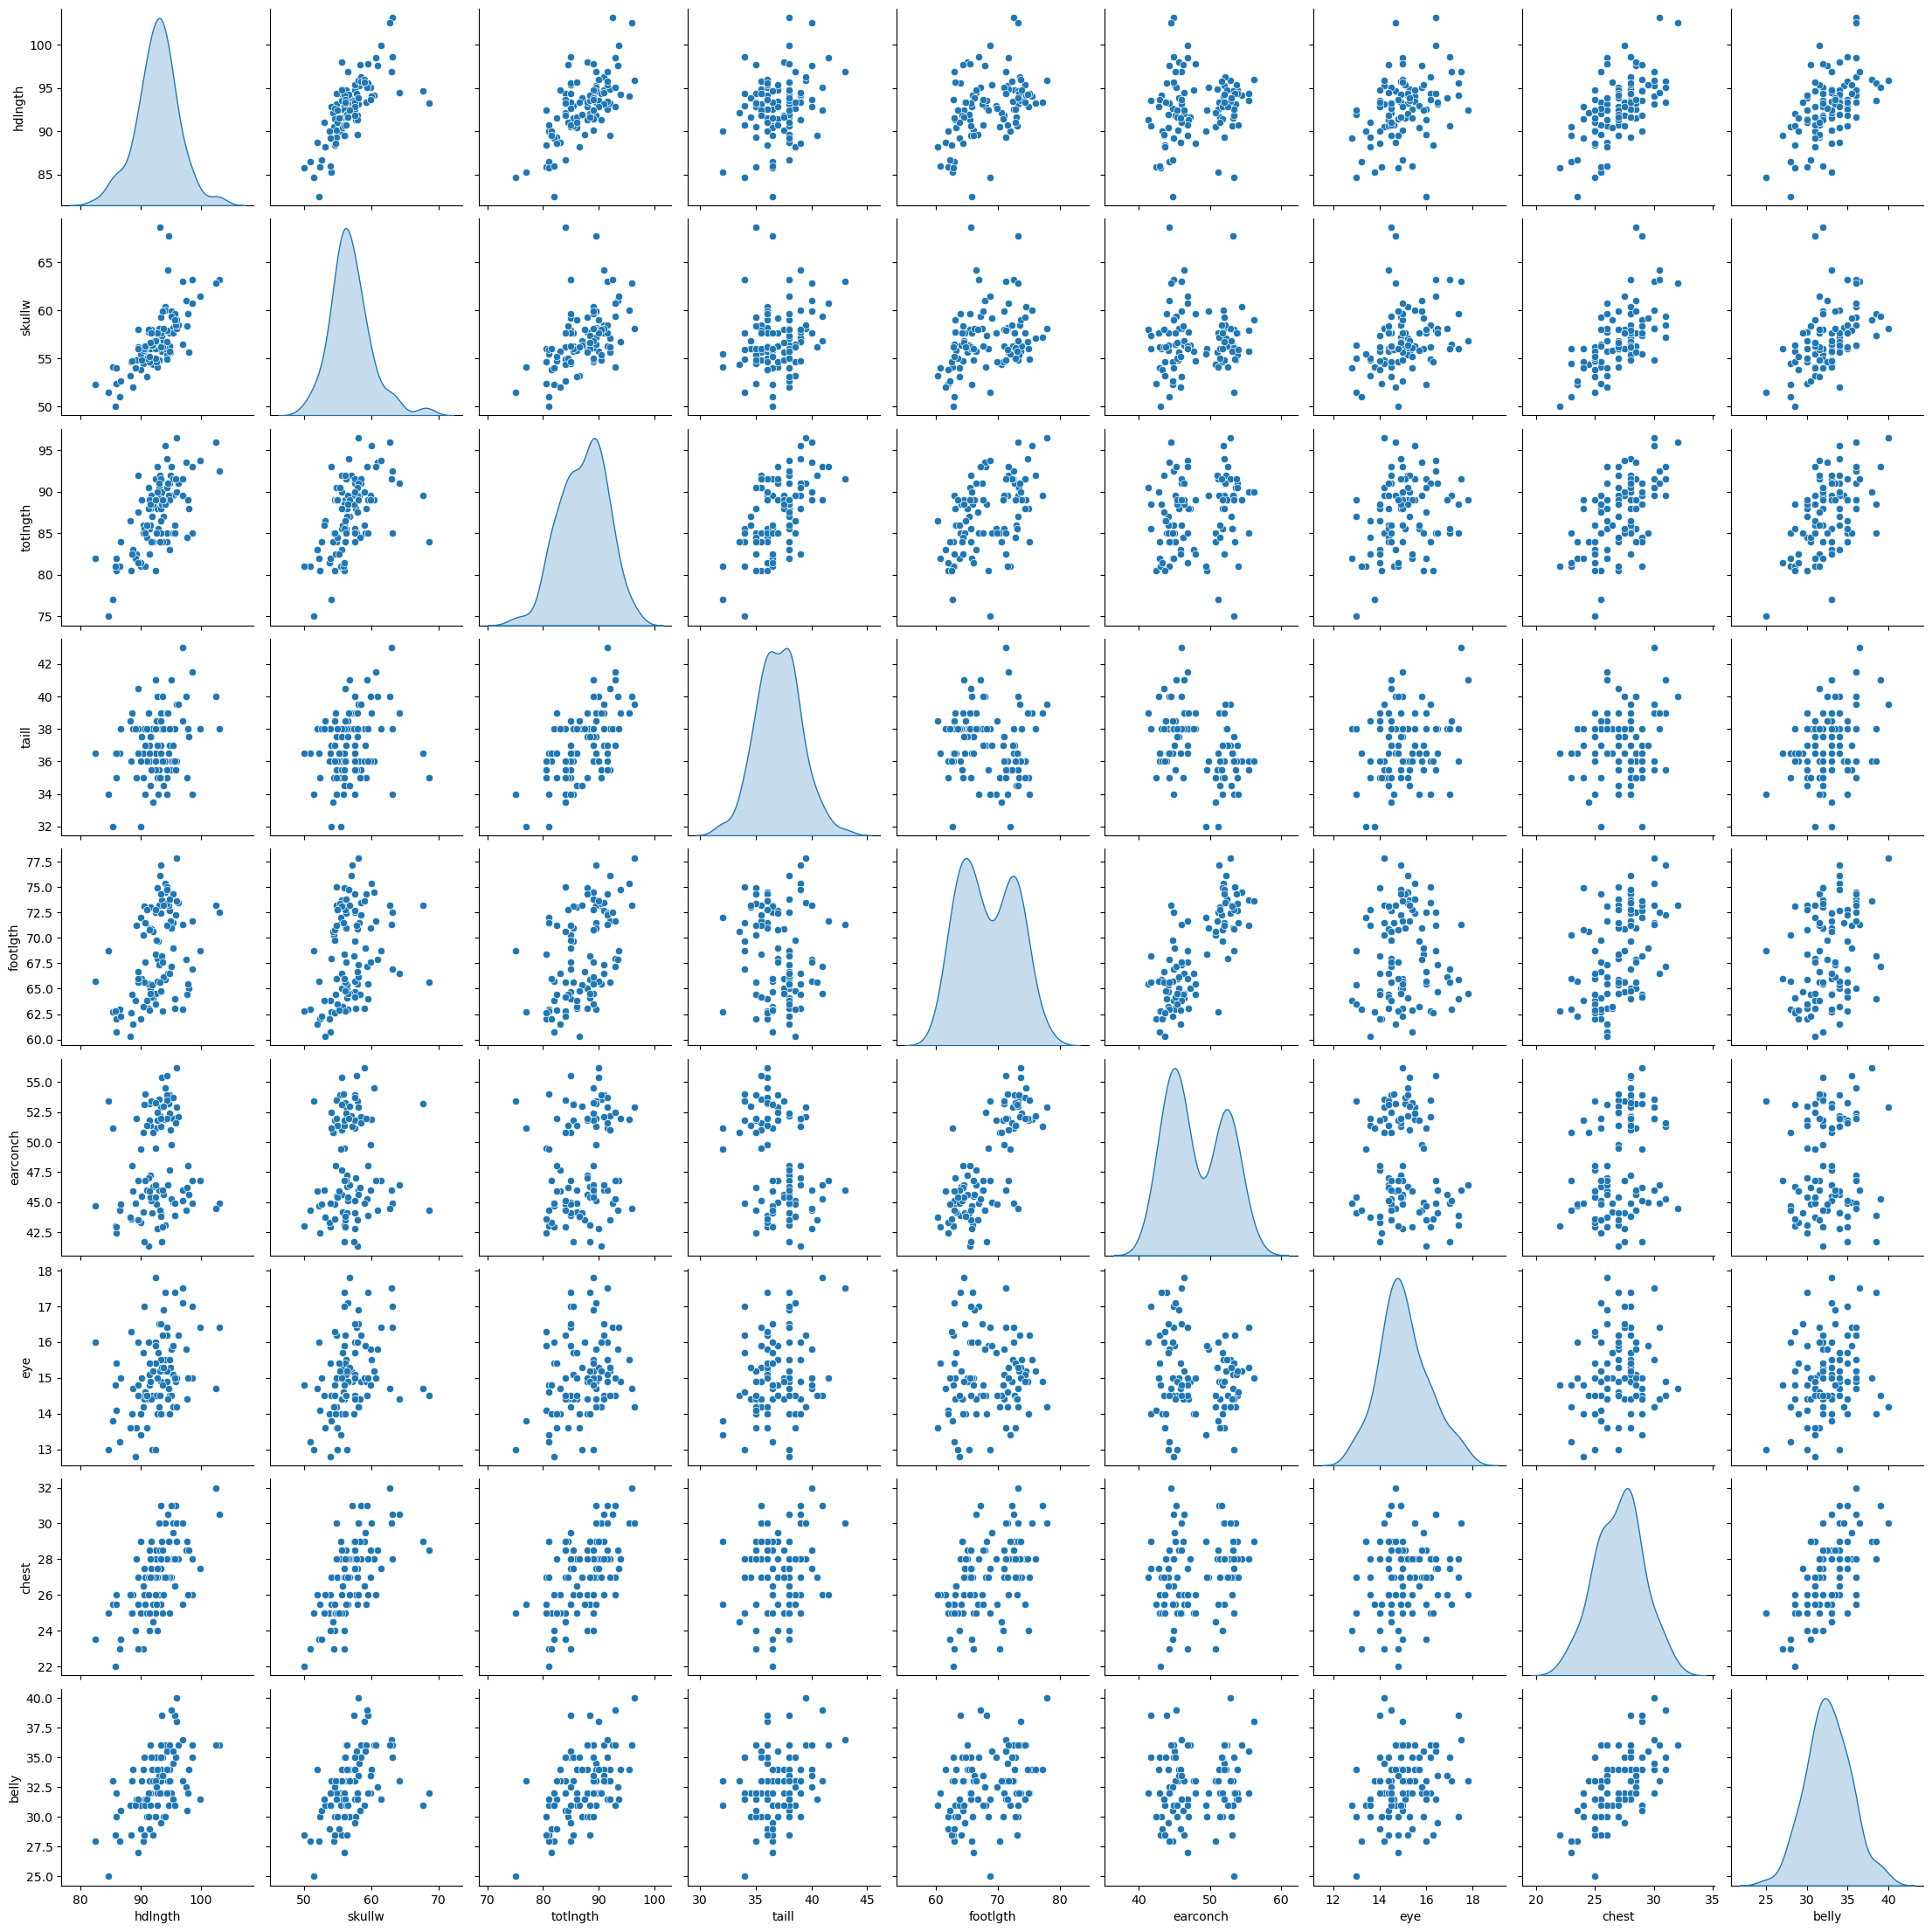

In [14]:
selected_columns = possum[["hdlngth", "skullw", "totlngth", "taill", "footlgth", "earconch", "eye", "chest", "belly"]]

sns.pairplot(selected_columns, diag_kind="kde")

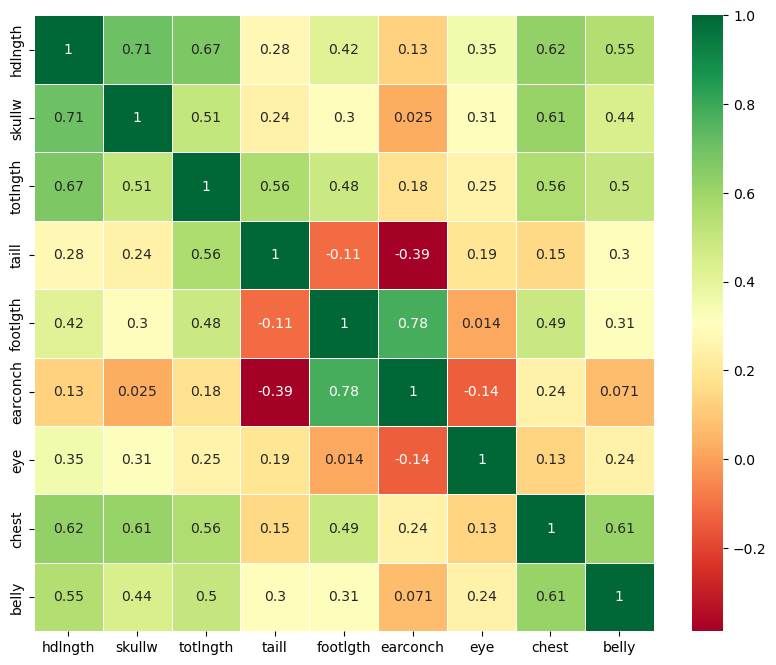

In [15]:
selected_columns = possum[["hdlngth", "skullw", "totlngth", "taill", "footlgth", "earconch", "eye", "chest", "belly"]]

# Create a correlation matrix
corr = selected_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.show()

Encode and split the data

In [16]:
for col in ['site', 'Pop', 'sex']:
    possum = pd.concat([possum, pd.get_dummies(possum[col])], axis = 1).drop([col], axis = 1)


In [17]:
boolean_columns = possum.select_dtypes(include='bool').columns.to_list()

possum[boolean_columns] = possum[boolean_columns].astype(int)

possum

age  hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  chest  \
0    8.0     94.1    60.4      89.0   36.0      74.5      54.5  15.2   28.0   
1    6.0     92.5    57.6      91.5   36.5      72.5      51.2  16.0   28.5   
2    6.0     94.0    60.0      95.5   39.0      75.4      51.9  15.5   30.0   
3    6.0     93.2    57.1      92.0   38.0      76.1      52.2  15.2   28.0   
4    2.0     91.5    56.3      85.5   36.0      71.0      53.2  15.1   28.5   
..   ...      ...     ...       ...    ...       ...       ...   ...    ...   
99   1.0     89.5    56.0      81.5   36.5      66.0      46.8  14.8   23.0   
100  1.0     88.6    54.7      82.5   39.0      64.4      48.0  14.0   25.0   
101  6.0     92.4    55.0      89.0   38.0      63.5      45.4  13.0   25.0   
102  4.0     91.5    55.2      82.5   36.5      62.9      45.9  15.4   25.0   
103  3.0     93.6    59.9      89.0   40.0      67.6      46.0  14.8   28.5   

     belly  ...  2  3  4  5  6  7  Vic  other  f  m  
0     36.0  ...  0  0  0  0  0  0    1      0  0  1  
1     33.0  ...  0  0  0  0  0  0    1      0  1  0  
2     34.0  ...  0  0  0  0  0  0    1      0  1  0  
3     34.0  ...  0  0  0  0  0  0    1      0  1  0  
4     33.0  ...  0  0  0  0  0  0    1      0  1  0  
..     ...  ... .. .. .. .. .. ..  ...    ... .. ..  
99    27.0  ...  0  0  0  0  0  1    0      1  0  1  
100   33.0  ...  0  0  0  0  0  1    0      1  0  1  
101   30.0  ...  0  0  0  0  0  1    0      1  1  0  
102   29.0  ...  0  0  0  0  0  1    0      1  0  1  
103   33.5  ...  0  0  0  0  0  1    0      1  1  0  

[101 rows x 21 columns]

In [18]:
possum_train_data = possum.sample(frac=0.8, random_state=0)#Splitting the data(80% for training and 20% for testing)
possum_test_data = possum.drop(possum_train_data.index)

possum_x_train = possum_train_data.copy()
possum_x_test = possum_test_data.copy()

possum_y_train = possum_x_train.pop('hdlngth')
possum_y_test = possum_x_test.pop('hdlngth')

possum_train_data.shape, possum_test_data.shape

((81, 21), (20, 21))

# Method

## `MLPClassify`
> My model to classify BNPL data into paid on time, paid late, and defaulted had a normalization layer followed by a dense layers with eight units and 1 output node which used softmax to classify. Softmax allows me to get the probability that each datapoint belongs to a specific class. My activation function was ReLU which is robust against vanishing gradients. Also to prohibit overfitting I used a dropout rate of 0.2.

## `MLPRegress`
> My model to predict possum head size had two dense layers with 64 neurons followed by one output node. All nodes, including the output node, used ReLU. Similar to `MLPClassify` ReLU allows me to add nonlinearity to my data while protecting against vanishing gradients. I did not use dropout in this model.

Summarize your deep neural network model architectures and component selections for regression and classification here. **Explain** your choice of model and your implementation.
Use the subclass models to create `MLPRegress` and `MLPClassify` classes.  

NOTE: We do not consider comments in the code cell as a proper writing. Make sure explain in a Markdown cell not regardless the comment in the code cell.


### Helper functions

In [19]:
def plot_learning(history, label: str, metric, val_metric):
    plt.plot(history.history[metric], label=metric)
    plt.plot(history.history[val_metric], label=val_metric)
    plt.xlabel('Epoch')
    plt.ylabel(f'Error [{label}]')
    plt.legend()

## Categorical

In [ ]:
class Normalizer(keras.Model):
    """Save the normalizer."""

    def __init__(self, x_train):
        super().__init__()
        self.normalizer = keras.layers.Normalization()
        self.normalizer.adapt(x_train)

        print(self.normalizer)

    def call(self, inputs):
        return self.normalizer(inputs)


class NetworkLayers(keras.Model):
    """Normalize -> Hidden -> Output."""

    def __init__(self, n_hidden, n_output, activ_hidden,activ_output, dropout):
        super().__init__()

        self.hidden = keras.layers.Dense(n_hidden, activation = activ_hidden)
        self.hidden_dropout = keras.layers.Dropout(dropout, noise_shape=None, seed=None)      
        self.out = keras.layers.Dense(n_output, activation = activ_output)


    def call(self, inputs, training = False):
        """Forward"""
        
        x = self.hidden(inputs)
        x = self.hidden_dropout(x, training = training)
        return self.out(x)


class MLPClassify(keras.Model):
    """Combines the normalizer and other layers."""

    def __init__(self, x_train, n_hidden, n_output, activ_hidden,activ_output, dropout):
        super().__init__()
        self.normalizer = Normalizer(x_train)
        self.DenseLayers = NetworkLayers(n_hidden, n_output, activ_hidden,activ_output, dropout)

    def call(self, inputs):
        x = self.normalizer(inputs)
         
        return self.DenseLayers(x)


## Regression

In [30]:
class MLPRegress:
    
    def __init__(self, x_train):

        normalizer = keras.layers.Normalization()
        normalizer.adapt(x_train)

        self.linear_model = keras.Sequential(
            [normalizer,
            keras.layers.Dense(64, activation = "relu"),
            keras.layers.Dense(64, activation = "relu"),
            keras.layers.Dense(1, activation = "relu"),
        ])
    def call(self, inputs):
        return self.linear_model(inputs)



# Experiments

## Categorical
> I used Adam as my optimizer with a loss of categorical cross entropy and an accuracy metric of accuracy. My learning rate was .02 and I trained for 300 epochs with a validation split of 0.2. Afterwards, I predicted on my training data. 

|  Variable |  Accuracy |
|------|-----------|
| Accuracy of Paid on Time |76.41 % |
| Accuracy of Late Payment |84.45 %|
| Accuracy of Defaulted | 90.56 % |

> Interestingly, although more people paid on time, the model had the hardest time predicting that someone would pay on time accurately and the easiest time predicting that someone would default, despite the fewest amount of people defaulting. It is important to note that due to the random initalization of gradients the actual accuracies change after each run, but the accuracy trend is consistent. The model also had a very low error with a loss of 0.67 and a validation loss of 0.66. On the testing dataset there was a loss of 0.65 and a overall accuracy of 0.76


## Regression
> I used stocastic gradient descent which means the model trains on small batches of data radnomly with a learning rate of 0.01 and a error metric of mean absloute error. I trained for 600 epochs and had a validation split of 0.1 since my dataset was small. Although my loss started extremely high (92.56) it quickly reached 6.96. The training error was 6.98. 

>On my plot of the actual and predicted values it is evident that the model was not able to completely predict the head lengths, although the model was able to gleam the general trends. Generally, the predicted graph decreases with the actual graph.

Apply your MLP instances to the two datasets and discuss the results.
Use a proper visualization of results to enhance your observation and related discussions.
Don't forget to explain your experiments and related codes.

**Don't forget to analyze your observations and discuss about them. **
You may have subsections of results and discussions here.


## Categorical

<Normalization name=normalization, built=True>
CPU times: total: 12min 9s
Wall time: 9min 19s


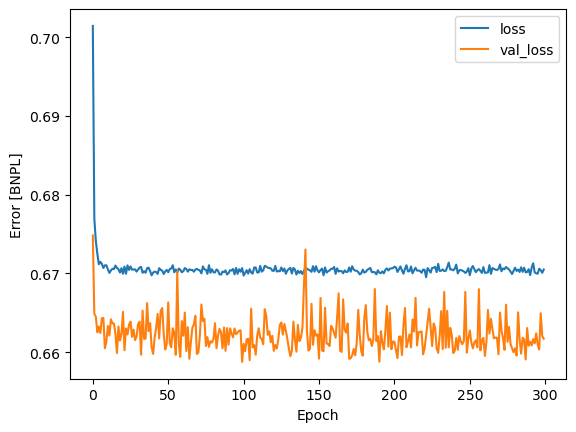

In [ ]:
%%time

bnpl_model = MLPClassify(bnpl_x_train.to_numpy(), n_hidden=8, n_output=3, dropout = 0.2, activ_hidden = "relu",activ_output = "softmax")
bnpl_optimizer = keras.optimizers.Adam(learning_rate=1e-2)
bnpl_model.compile(bnpl_optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])


# model.fit(x_train.to_numpy(), y_train.to_numpy(), epochs=300)

bnpl_history = bnpl_model.fit(x = bnpl_x_train.to_numpy(), y = bnpl_y_train, epochs = 300,
                verbose = 0, validation_split = 0.2)

plot_learning(bnpl_history, "BNPL", "loss", "val_loss")

Evaluate and Predict

In [23]:
bnpl_model.evaluate(bnpl_x_test, bnpl_y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7571 - loss: 0.6518


[0.6517612934112549, 0.757099986076355]

In [24]:
bnpl_predictions = bnpl_model.predict(bnpl_x_test)
bnpl_predictions


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step


array([[0.87528664, 0.09755082, 0.02716248],
       [0.8483119 , 0.1154769 , 0.03621111],
       [0.8682843 , 0.10232762, 0.02938802],
       ...,
       [0.73199785, 0.1861367 , 0.0818655 ],
       [0.6611395 , 0.22364435, 0.11521617],
       [0.6611395 , 0.22364435, 0.11521617]], dtype=float32)

In [25]:
result = np.zeros_like(bnpl_predictions)
result[np.arange(bnpl_predictions.shape[0]), np.argmax(bnpl_predictions, axis=1)] = 1

In [26]:
# bnpl_predictions = bnpl_model.predict(bnpl_x_test)

plot_df = pd.concat([pd.DataFrame(bnpl_y_test, columns=['A. Paid On Time', 'A. Late Payment', 'A. Defaulted']), 
                    pd.DataFrame((result), columns=['P. Paid On Time', 'P. Late Payment', 'P. Defaulted'])], axis = 1)

print("Accuracy of Paid on Time")
print((len(plot_df[plot_df["A. Paid On Time"] == plot_df["P. Paid On Time"]]) / plot_df.shape[0]) * 100, "%")

print("Accuracy of Late Payment")
print((len(plot_df[plot_df["A. Late Payment"] == plot_df["P. Late Payment"]]) / plot_df.shape[0]) * 100, "%")

print("Accuracy of Defaulted")
print((len(plot_df[plot_df["A. Defaulted"] == plot_df["P. Defaulted"]]) / plot_df.shape[0]) * 100, "%")


Accuracy of Paid on Time
76.41 %
Accuracy of Late Payment
84.45 %
Accuracy of Defaulted
90.56 %


## Regression

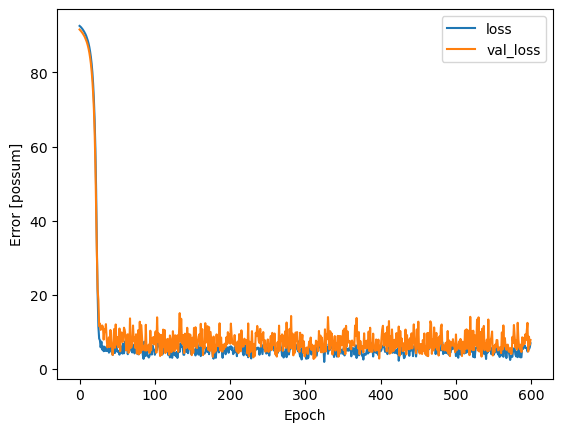

In [31]:
possum_model = MLPRegress(possum_x_train.to_numpy())
possum_optimizer = keras.optimizers.SGD(learning_rate=0.01)
possum_model.linear_model.compile(optimizer = possum_optimizer, loss="mean_absolute_error")


possum_history = possum_model.linear_model.fit(x = possum_x_train.to_numpy(), y = possum_y_train, epochs = 600,
                verbose = 0, validation_split = 0.1)

plot_learning(possum_history, "possum", "loss", "val_loss")

In [32]:
possum_model.linear_model.evaluate(possum_x_test, possum_y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 6.9803


6.980309963226318

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


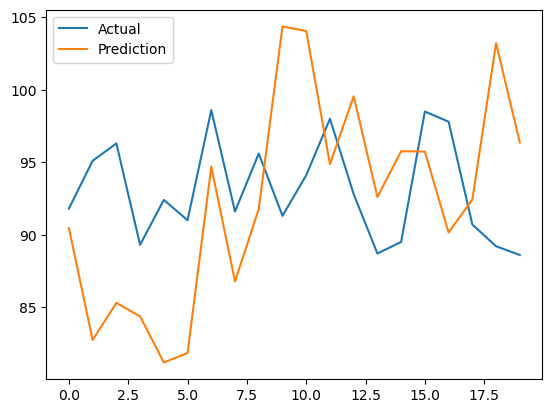

In [33]:
possum_predictions = possum_model.linear_model.predict(possum_x_test)


plt.plot(possum_y_test.to_numpy().T, label="Actual")
plt.plot(possum_predictions.T[0], label="Prediction")
plt.legend()



# Conclusions

Overall I was able to create two models (one for classification and one for regression) which was generally able to gleam relevant trends from data. The classification model performed better than the regression model and I believe this is simply due to dataset size. The regresssion dataset was had 104 observations while the classification dataset had 50,000. This means that after removing the 3 NA vlaues, an 80-20 test train split, and a validation split it is possible that the regression trainig data was left without enough datapoints to learn highly generalizable trends from the data. 

This assignment allowed me to become more comfortable applying regression and classification deep learning models to datasets. I had to think about issues such as balancing model performance with computational demand which are real-world issues.

# References

Viraj Bhanage. (2026). Buy Now, Pay Later (BNPL) Dataset: [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/14730479

ABeyer. (2021, August 17). Possum regression. Kaggle. https://www.kaggle.com/datasets/abrambeyer/openintro-possum 

John H Maindonald, & W John Braun (2011). Data analysis and graphics using R. An Example-Based Approach.. Cambridge University Press.



# AI Acknowledgement

"I have not used AI for the assignment." 



## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. **


Points | | Description
--|--|:--
5 | Introduction  
20 | Data |
 | 5| description
 | 5| plots for understanding or analysis
 | 5| preliminary observation
 | 5| Preprocessing of the data
40 | Method |
 | 10| Explanation of deep network architecture and choice of components
 | 10| explanation of codes
 | 20| Correct implementation/Preliminary Test
30 | Experiments |
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis & retesting if need  
5 | Conclusions, References